In [1]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, RationalQuadratic, RBF
import warnings
warnings.filterwarnings("ignore")

In [2]:
symbols = pd.read_csv('futures.txt', sep=';', header = 0)

In [3]:
from utils import get_df_symbols
datasets = get_df_symbols(symbols, verbose=True)

Getting Oro dataset
Getting Petróleo WTI dataset
Getting Natural Gas dataset
Getting Plata dataset
Getting RBOB Gasoline dataset
Getting Heating Oil dataset
Getting Platinum dataset
Getting Copper dataset
Getting Palladium dataset
Getting Corn Futures dataset
Getting Oat Futures dataset
Getting KC HRW Wheat Futures dataset
Getting Rough Rice Futures dataset
Getting Soybean Futures dataset
Getting Soybean Oil Futures dataset
Getting Cocoa dataset
Getting Coffee dataset
Getting Cotton dataset
Getting Sugar dataset


In [4]:
from utils import get_Xs_ys
Xs, ys = get_Xs_ys(datasets)

In [9]:
kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() * WhiteKernel()

In [10]:
X, y = Xs['Natural Gas'], ys['Natural Gas']
natural_gas_years = datasets['Natural Gas']

In [7]:
from A_varios.strategy_fun import strategy
years_pred, days_before, years_before = range(2011, 2012), 0, 6

for year_pred in years_pred:

    action, y_pred, y_std = strategy(kernel, X, y, year_pred, years_before, days_before, verbose=True)

Predicting year 2011 with data from 2005 to 2010
Elapsed time: 39.192s
Log-marginal-likelihood: 1045.658


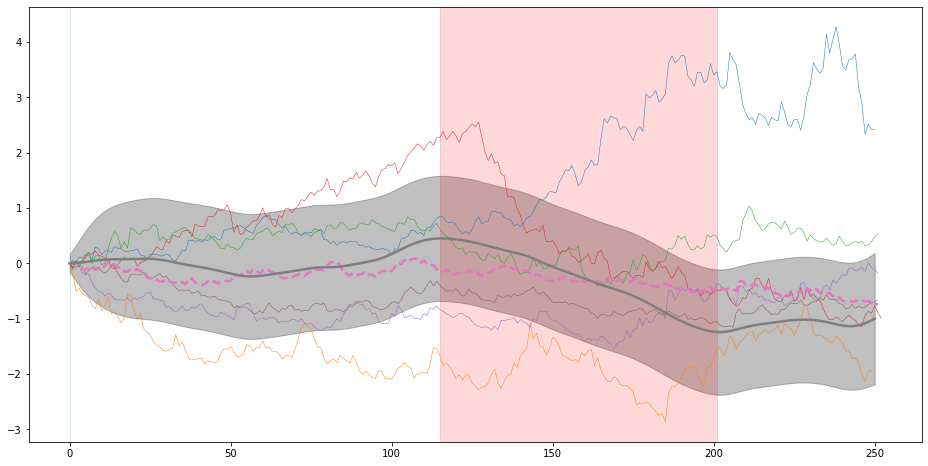

In [8]:
hco = natural_gas_years.loc[:,'{}-01-01'.format(year_pred - years_before - 1):'{}-01-01'.format(year_pred - 1)].plot(figsize=(16,8), legend=False, linewidth=.5)
p = hco.plot(natural_gas_years[str(year_pred)], linewidth=2.5, linestyle='--')

y_plot, y_plot[days_before:] = [None] * (len(y_pred) + days_before), y_pred
p = hco.plot(y_plot, linewidth=2.5)
p = hco.fill_between(range(days_before, len(y_pred) + days_before), y_pred - y_std, y_pred + y_std, alpha=0.25, color='k')

buy_start, buy_end, sell_start, sell_end = 0, 0, 0, 0
v_buy, v_sell = np.where(np.array(action) == 1)[0], np.where(np.array(action) == -1)[0]
if len(v_buy) > 0:
    buy_start, buy_end = v_buy[0] + days_before, v_buy[-1] + days_before
if len(v_sell) > 0:
    sell_start, sell_end = v_sell[0] + days_before, v_sell[-1] + days_before

p = hco.axvspan(buy_start, buy_end, alpha=0.15, color='green')
p = hco.axvspan(sell_start, sell_end, alpha=0.15, color='red')